In [1]:
# all bibliotheques necessaires of this TP
import numpy as np
import matplotlib.pyplot as plt

In this project, in addition to our course, I used the following references:
- [Finite Volume Methods for Hyperbolic Problems](https://www.cambridge.org/core/books/abs/finite-volume-methods-for-hyperbolic-problems/preface/7EB1BD7CD2A0CED49821234B977045B3)
- [Systems of Conservation Laws](https://www.math.colostate.edu/~pauld/M546/Systems%201.pdf)

# Exercise 1: Linear System of Conservation Laws

We consider a linear system of conservation laws given by:

$$
\partial_t U + A \partial_x U = 0,
$$

where 

$$
A = \begin{pmatrix} 1 & 0 & -1 \\ 0 & 2 & 1 \\ 0 & 1 & 0 \end{pmatrix}
$$

and $ U \in \mathbb{R}^3 $ on $ \Omega \times (0, T) $ with $ \Omega = [-1, 1] $.

### Tasks
**(a)** Prove that the linear system of conservation laws is hyperbolic. Compute the 
characteristic speeds and fields associated with $ A $ and determine the type of field.

**(b)** Compute the characteristic variables and determine the types of discontinuities that can arise for a Riemann Problem.

**(c)** Determine the exact solution based on the exact solution for the scalar problem.

**(d)** Implement the local Lax-Friedrichs scheme applied to the flux $ f(U) = AU $. For boundary values, use constant interpolation, i.e., $ u_0 = u_1 $ and $ u_{N+1} = u_N $ for a discretization with $ N $ cells and boundary cells $ u_0, u_{N+1} $.

**(e)** Solve the following Riemann Problem for the linear system with:

   $$
   U_L = \begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix}, \quad U_R = \begin{pmatrix} 0.5 \\ 0 \\ 0.1 \end{pmatrix}
   $$

   up to time $ T = 0.25 $, and compare the solution of the local Lax-Friedrichs scheme against the exact solution by plotting each component of $ U $ in the same plot.


## Ansewrs 

**(a)** Prove that the linear system of conservation law is hyperbolic. Compute the characteristic speeds and fields associated with $ A $ and determine the type of field.

To prove the linear system of conservation law is hyperbolic, we show that the eigenvalues associated with the matrix $ A $ are real. So, for that, we calculate the characteristic polynomial:

$$
P(\lambda) = \det(A - \lambda I) = \det \begin{pmatrix}
1 - \lambda & 0 & -1 \\
0 & 2 - \lambda & 1 \\
0 & 1 & -\lambda
\end{pmatrix} = 0
$$

We develop the determinant, and we obtain the characteristic polynomial:

$$
\begin{aligned}
P(\lambda) &= (1 - \lambda) \left| \begin{matrix}
2 - \lambda & 1 \\
1 & -\lambda
\end{matrix} \right| \\
&= (1 - \lambda) \left( -\lambda (2 - \lambda) - 1 \right) \\
&= (1 - \lambda) (\lambda^2 - 2\lambda - 1)
\end{aligned}
$$

Thus,

$$
\begin{aligned}
P(\lambda) = 0 &\implies (\lambda - 1) = 0 \text{ or } \lambda(2 - \lambda) + 1 = 0 \\
&\implies \lambda = 1 \text{ or } -\lambda^2 + 2\lambda + 1 = 0 \\
&\implies \lambda = 1 \text{ or } \lambda^2 - 2\lambda - 1 = 0 \\
&\implies \lambda = 1 \text{ or } \Delta = 4 + 4 = 8 > 0 \\
&\implies \lambda = 1 \text{ or } \lambda = \frac{2 \pm 2\sqrt{2}}{2} \\
&\implies \lambda = 1 \text{ or } \lambda = 1 \pm \sqrt{2}
\end{aligned}
$$

The set $ S $ of the solutions of $ P $ is: 
$$
S = \{1 - \sqrt{2},1, 1 + \sqrt{2}\}
$$

We have the three solutions are real, then our system is hyperbolic. Likewise, since all this solutions are different then the system is strict hyperbolic. 

For this question, we can use the function `np.linalg.eig` from NumPy to determine the eigenvalues. The same for eigenvectors

In [2]:
# Matrix A
A = np.array([[1, 0, -1],
              [0, 2, 1],
              [0, 1, 0]])

# Compute eigenvalues
eigenvalues,eigenvector= np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvector)

Eigenvalues: [ 1.          2.41421356 -0.41421356]
Eigenvectors: [[ 1.         -0.26120387  0.54691816]
 [ 0.          0.89180581 -0.32037724]
 [ 0.          0.36939806  0.77345908]]


To determine the characteristic fields associated with each eigenvalue, we search for the eigenvectors corresponding to each eigenvalue.
$$
A v = \lambda v \quad \text{such that} \quad v = \begin{pmatrix} x \\ y \\ z \end{pmatrix}
$$
For $\lambda_1 = 1 - \sqrt{2}$:

This gives us the system:
$$
\begin{cases}
x - z = (1 - \sqrt{2}) x \\
2y + z = (1 - \sqrt{2}) y \\
y = (1 - \sqrt{2}) z
\end{cases}
\quad \implies \quad
\begin{cases}
 \sqrt{2} x = z \\
  z - \sqrt{2} z + z  = -\sqrt{2} (1-\sqrt{2}) z \\
y = (1-\sqrt{2}) z
\end{cases}
$$
$$
\quad \implies \quad
\begin{cases}
 x =\frac{z}{ \sqrt{2}}  \\
  y = (1-\sqrt{2}) z \\
z - \sqrt{2} z + z = -\sqrt{2}(z - \sqrt{2}z)
\end{cases}
\quad \implies \quad
\begin{cases}
  x =\frac{z}{ \sqrt{2}}  \\
  y = (1-\sqrt{2}) z \\
z \in R
\end{cases}
$$
Thus, the eigenvector associeted $\lambda_1$ is given by $r_1 = z (\frac{\sqrt{2}}{2},1 - \sqrt{2},1)^T$ with $ x \in R$ we take $x=1$ then $r_1 = (\frac{\sqrt{2}}{2},1 - \sqrt{2},1)^T$

For $\lambda_2 = 1$:

This gives us the system:
$$
\begin{cases}
x - z = x \\
2y + z = y \\
z = y
\end{cases}
\quad \implies \quad
\begin{cases}
x \in \mathbb{R} \\
z = 0 \\
y + z = 0 \\
z = y
\end{cases}
\quad \implies \quad
\begin{cases}
x \in \mathbb{R} \\
z = y = 0
\end{cases}
$$

Thus, the eigenvector associeted $\lambda_2$ is given by $r_2 = x (1,0,0)^T$ with $ x \in R$ we take $x=1$ then $r_2 = (1,0,0)^T$

For $\lambda_3 = 1 + \sqrt{2} $:

This gives us the system:
$$
\begin{cases}
x - z = (1 + \sqrt{2}) x \\
2y + z = (1 + \sqrt{2}) y \\
y = (1 + \sqrt{2}) z
\end{cases}
\quad \implies \quad
\begin{cases}
 \sqrt{2} x = -z \\
  z + \sqrt{2} z + z  = \sqrt{2} (1+\sqrt{2}) z \\
y = (1+\sqrt{2}) z
\end{cases}
$$
$$
\quad \implies \quad
\begin{cases}
 x =-\frac{z}{ \sqrt{2}}  \\
  y = (1+\sqrt{2}) z \\
z + \sqrt{2} z + z = \sqrt{2}(z + \sqrt{2}z)
\end{cases}
\quad \implies \quad
\begin{cases}
  x =-\frac{z}{ \sqrt{2}}  \\
  y = (1+\sqrt{2}) z \\
z \in R
\end{cases}
$$

Thus, the eigenvector associated with $\lambda_3$ is given by $r_3 = x (-\frac{\sqrt{2}}{2},1 + \sqrt{2},1)^T$ with $x \in \mathbb{R}$. We take $x = 1$, then $r_3 = (-\frac{\sqrt{2}}{2},1 + \sqrt{2},1)^T$.

Thus, the system is hyperbolic with speeds (eigenvalues) and corresponding characteristic fields (eigenvectors) as follows:
- Characteristic speed $\lambda_1 = 1 - \sqrt{2}$ has field $r_1 = \begin{pmatrix} \frac{\sqrt{2}}{2} \\ 1 - \sqrt{2} \\ 1 \end{pmatrix}$
- Characteristic speed $\lambda_2 = 1$ has field $r_2 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$
- Characteristic speed $\lambda_3 = 1 + \sqrt{2}$ has field $r_3 = \begin{pmatrix} -\frac{\sqrt{2}}{2} \\ 1 + \sqrt{2} \\ 1 \end{pmatrix}$

These speeds and fields provide the linear propagation characteristics of the system, and these fields are always linearly degenerate by Remark (2.11).


**(b)** Compute the characteristic variables and determine the types of discontinuities that can arise for a Riemann Problem.

By question *(a)* we are calculating the eigenvalues and eigenvectors associted the matrix $A$ such that : 
- Characteristic speed $\lambda_1 = 1 - \sqrt{2}$ has field $r_1 = \begin{pmatrix} \frac{\sqrt{2}}{2} \\ 1 - \sqrt{2} \\ 1 \end{pmatrix}$
- Characteristic speed $\lambda_2 = 1$ has field $r_2 = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$
- Characteristic speed $\lambda_3 = 1 + \sqrt{2}$ has field $r_3 = \begin{pmatrix} -\frac{\sqrt{2}}{2} \\ 1 + \sqrt{2} \\ 1 \end{pmatrix}$

It means that $A$ is diagonalizable
$$
A = R \Lambda R^{-1}
$$
with 
$$
R = (r_1,r_2,r_3)= \begin{pmatrix}
\frac{\sqrt{2}}{2} & 1 & -\frac{\sqrt{2}}{2} \\
1 - \sqrt{2} & 0 & 1 + \sqrt{2} \\
1 & 0 & 1
\end{pmatrix}
$$
and 
$$
\Lambda = \begin{pmatrix}
1 - \sqrt{2} & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 + \sqrt{2}
\end{pmatrix}
$$

To calculate the characteristic variables, we replace $ A $ by the diagonalizable form in the hyperbolic equation.
$$
\partial_t U + R \Lambda R^{-1} \partial_x U = 0,
$$
which means
$$
R^{-1} \partial_t U + \Lambda R^{-1} \partial_x U = 0.
$$
Since $ R $ is independent of the couple $(t, x)$, we have:
$$
\partial_t (R^{-1} U) + \Lambda \partial_x (R^{-1} U) = 0.
$$
Let $ V = R^{-1} U $, this is the characteristic variable with $ V_0 = R^{-1} U_0 $.

Thus,
$$
\begin{cases}
\partial_t V + \Lambda \partial_x V = 0 \\
V_0 = R^{-1} U_0
\end{cases}
$$
For each component $ v_i $ of $ V $, we have:
$$
\begin{cases}
\partial_t v_i + \lambda_i \partial_x v_i = 0 \\
v_i(x, 0) = (R^{-1} U_0) = V_0(x)
\end{cases}
$$

For a Rieman problem with weak solution $U(x,t)$ given by 
$$
U(x,t)=\begin{cases}
u_L & \text{if } \frac{x}{t}<\sigma \\
u_R & \text{if } \frac{x}{t}>\sigma 
\end{cases}
$$
To determine the type of discontinuities, by Remark (2.11) in the course, for a linear system $\nabla f(U) = A$ is independent of $ U $, thus all fields are linearly degenerate. This means the discontinuity is called an i-contact wave, we don't have shock


**(c)** Determine the exact solution based on the exact solution for the scalar problem.


We know that $ V = R^{-1}U $, then the solution of our hyperbolic system is given by 
$$
U(x,t) = \sum_{i=1}^3 v_i(x,t) \vec{r_i}
    = \sum_{i=1}^3 V_0(x-\lambda_i t) \vec{r_i}
$$
This means that 
$$
\begin{cases}
U(x,t) = V_0(x-\lambda_1 t) \vec{r_1} + V_0(x-\lambda_2 t) \vec{r_2} + V_0(x-\lambda_3 t) \vec{r_3} \\
V_0(x) = R^{-1}U_0(x)
\end{cases}
$$
$$
U(x,t) = \begin{pmatrix} V_0^1 \\ V_0^2 \\ V_0^3 \end{pmatrix} = \begin{pmatrix} \alpha_L \\ \beta_L \\ \gamma_L \end{pmatrix} \mathbf{1}_{X^-} + \begin{pmatrix} \alpha_R \\ \beta_R \\ \gamma_R \end{pmatrix} \mathbf{1}_{X^+}
$$
Thus,
$$
U(x,t) = ( \alpha_L \mathbf{1}^-(x-\lambda_1 t) + \alpha_R \mathbf{1}^+(x-\lambda_1 t)) \vec{r_1} \\
+ ( \beta_L \mathbf{1}^-(x-\lambda_2 t) + \beta_R \mathbf{1}^+(x-\lambda_2 t)) \vec{r_2} \\
+ ( \gamma_L \mathbf{1}^-(x-\lambda_3 t) + \gamma_R \mathbf{1}^+(x-\lambda_3 t)) \vec{r_3}
$$
Then,
$$
U(x,t)=\begin{cases}
\alpha_L r_1 + \beta_L r_2 + \gamma_L r_3 & \text{if } \frac{x}{t}<\lambda_1 \\
\alpha_R r_1 + \beta_L r_2 + \gamma_L r_3 & \text{if } \lambda_1<\frac{x}{t}<\lambda_2 \\ 
\alpha_R r_1 + \beta_R r_2 + \gamma_L r_3 & \text{if } \lambda_2<\frac{x}{t}<\lambda_3 \\ 
\alpha_R r_1 + \beta_R r_2 + \gamma_R r_3 & \text{if } \frac{x}{t}>\lambda_3
\end{cases}
$$

In [3]:
# Define the matrix A and its eigenvalues and eigen
A = np.array([[1, 0, -1], [0, 2, 1], [0, 1, 0]])
# Eigenvalues and eigenvectors
eigenvalues = np.array([1 - np.sqrt(2),1 , 1 +  np.sqrt(2)])
eigenvector = np.array([
    [np.sqrt(2)/2, 1 - np.sqrt(2),1],
    [1, 0, 0],
    [-np.sqrt(2)/2, 1 + np.sqrt(2),1]
]).T

# Project the initial conditions onto the characteristic variables
def project_onto_characteristic_variables(U, eigenvector):
    # Compute the inverse of the eigenvector matrix
    R_inv = np.linalg.inv(eigenvector)
    return np.dot(R_inv, U)
# Define the solution function
def solution(x, t, VL, VR, eigenvalues, eigen):
    # Initialize the solution
    solution = np.zeros((len(x), 3))
    for i in range(len(x)):
        if x[i] < eigenvalues[0]*t:
            solution[i] = VL[0] * eigen[:, 0] + VL[1] * eigen[:, 1] + VL[2] * eigen[:, 2]
        elif eigenvalues[0] * t <= x[i] < eigenvalues[1]*t:
            solution[i] = VR[0] * eigen[:, 0] + VL[1] * eigen[:, 1] + VL[2] * eigen[:, 2]
        elif eigenvalues[1]*t <= x[i] < eigenvalues[2]*t:
              solution[i] =  VR[0] * eigen[:, 0] + VR[1] * eigen[:, 1] + VL[2] * eigen[:, 2]
        else:
            solution[i] = VR[0] * eigen[:, 0] + VR[1] * eigen[:, 1] + VR[2] * eigen[:, 2]
    
    return solution

I tested my solution obtained.

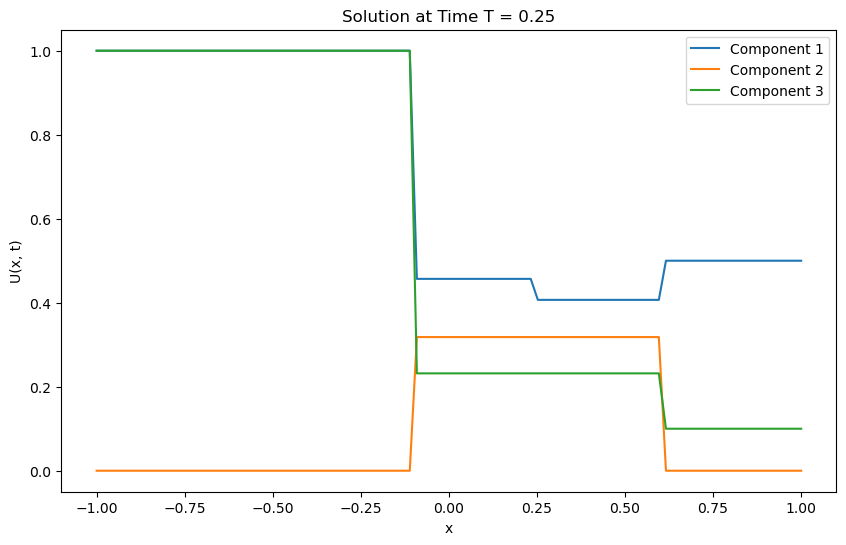

In [4]:
# Generate x values
x = np.linspace(-1, 1, 100)
# Time
t = 0.25
# Define the initial conditions
UL = np.array([1, 0, 1])
UR = np.array([0.5, 0, 0.1])
# Project the initial conditions onto the characteristic variables
VL = project_onto_characteristic_variables(UL, eigenvector)
VR = project_onto_characteristic_variables(UR, eigenvector)
# Compute the solution
U = solution(x, t, VL, VR, eigenvalues, eigenvector)
# Plot the solution
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(x, U[:, i], label=f'Component {i+1}')
plt.xlabel('x')
plt.ylabel('U(x, t)')
plt.title('Solution at Time T = 0.25')
plt.legend()
plt.show()

**(d)** Implement the local Lax-Friedrichs scheme applied to the flux $ f(U) = AU $. For boundary values, use constant interpolation, i.e., $ u_0 = u_1 $ and $ u_{N+1} = u_N $ for a discretization with $ N $ cells and boundary cells $ u_0, u_{N+1} $.


In [5]:
# The flux function
def flux(U, A):
    return np.dot(A, U)

In [6]:
# Local Lax-Friedichs scheme 
def local_lax_friedrichs(N, T,x, A,a,b, UL, UR):
    # Compute the flux
    # Compute the solution at the next time step
    U = np.zeros((3, N))
    for i in range(N):
        U[:, i] = UL if x[i] < 0 else UR
    alpha = np.max(np.abs(eigenvalues))
    dx = (b - a) / N
    dt = 0.2 * dx / alpha
    Nt = int(T/dt)
    U[:, 0] = UL
    U[:, -1] = UR
    for n in range(Nt):
        # Apply boundary conditions
        U_new = np.zeros_like(U)
        U_new[:, 0] = U[:, 0]
        for i in range(1,N-1):
            F_plus_half = 0.5*(flux(U[:,i],A) + flux(U[:,i+1],A)) + (alpha/2)*(-U[:, i+1] + U[:, i])
            F_moins_half = 0.5*(flux(U[:,i-1],A) + flux(U[:,i],A)) + (alpha/2)*(-U[:, i] + U[:, i-1])
            U_new[:,i] = U[:,i] - dt / dx * (F_plus_half - F_moins_half)
        U_new[:, -1] = U[:, -1]
        U = U_new
    
    return U


**(e)** Solve the following Riemann Problem for the linear system with:

   $$
   U_L = \begin{pmatrix} 1 \\ 0 \\ 1 \end{pmatrix}, \quad U_R = \begin{pmatrix} 0.5 \\ 0 \\ 0.1 \end{pmatrix}
   $$

   up to time $ T = 0.25 $, and compare the solution of the local Lax-Friedrichs scheme against the exact solution by plotting each component of $ U $ in the same plot.


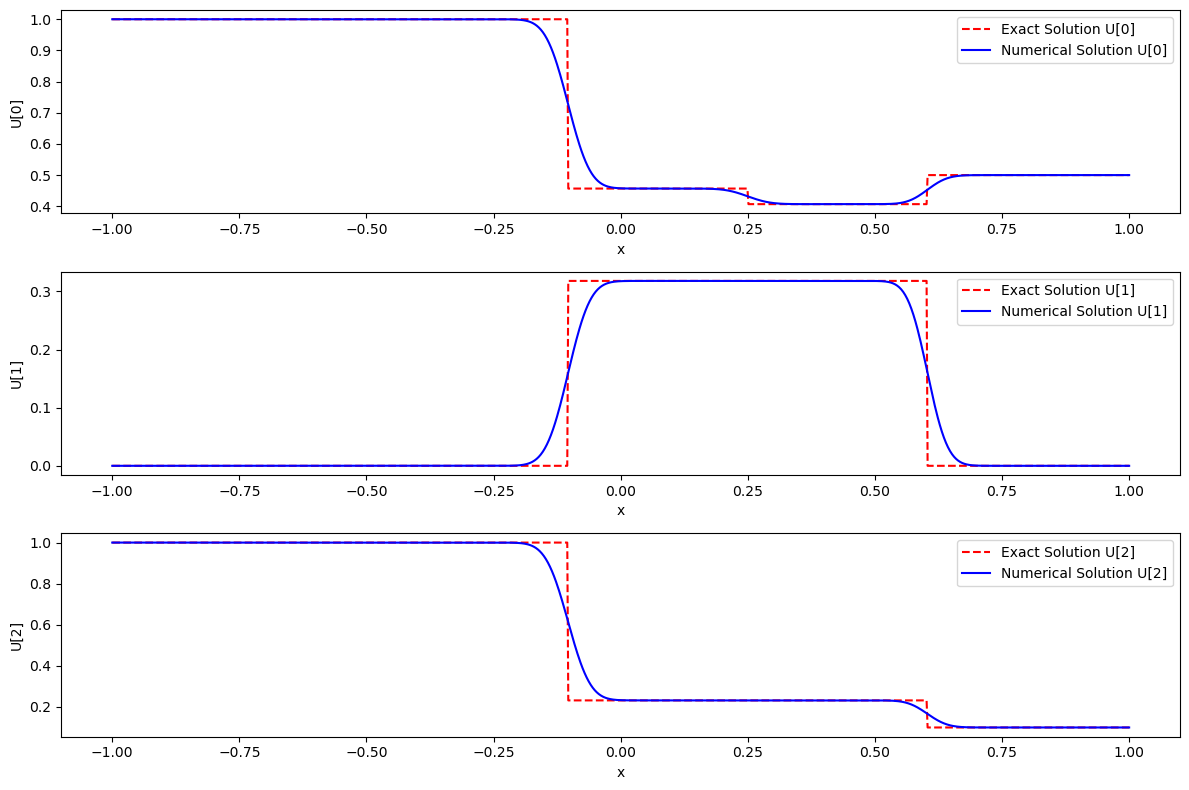

In [7]:
a = -1
b = 1
N = 1000
T = 0.25
x = np.linspace(a, b, N)
# Calcul des solutions
# Define the initial conditions
UL = np.array([1, 0, 1])
UR = np.array([0.5, 0, 0.1])
# Project the initial conditions onto the characteristic variables
VL = project_onto_characteristic_variables(UL, eigenvector)
VR = project_onto_characteristic_variables(UR, eigenvector)
# Compute the exact and approximate solutions
U_exact = solution(x, t, VL, VR, eigenvalues, eigenvector)
U_app = local_lax_friedrichs(N, T, x, A, a, b, UL, UR)

# Tracé des résultats
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(x, U_exact[:,i], 'r--', label=f'Exact Solution U[{i}]')
    plt.plot(x, U_app[i, :], 'b-', label=f'Numerical Solution U[{i}]')
    plt.xlabel('x')
    plt.ylabel(f'U[{i}]')
    plt.legend()
plt.tight_layout()
plt.show()

As we can see in these figures, the LLF method converges to the exact solution, but it does not capture the points of discontinuity accurately. However, it is still the best approximation for our problem.

# Exercise 2: Riemann solver for the Saint-Venant system

We consider the Saint-Venant system
$$
\partial_t
\begin{pmatrix}
h \\
hu
\end{pmatrix}
+ \partial_x
\begin{pmatrix}
hu \\
hu^2 + g \frac{h^2}{2}
\end{pmatrix}
= 0 \quad \text{on} \ [a, b] \times (0, T)
$$
with $ h > 0 $, $ g = 9.81 \, \text{m/s}^2 $.

**(a)** Implement the exact Riemann solver discussed in the lecture in Section 2.4. To solve the non-linear system to determine $ h_m $, implement the Newton solver.

**(b)** Find initial conditions $ U_L, U_R $ such that the solution contains
1. only shock waves
2. only rarefaction waves
3. rarefaction and shock waves

**(c)** Compute a numerical reference solution on a fine grid using $ N = 1000 $ cells with the local Lax-Friedrichs scheme for the initial Riemann Problems (i), (ii), (iii). Plot the numerical solution using the exact Riemann solver with $ N = 100 $ cells against the reference solution to verify if the exact Riemann solver is implemented correctly.

# Ansewers 

**(a)** Implement the exact Riemann solver discussed in the lecture in Section 2.4. To solve the non-linear system to determine $ h_m $, implement the Newton solver.


To implement the exact Riemann solver, we use the algorith_m discussed in our course. From this, we know the information we need, such as eigenvalues, eigenvectors, and some forms and equations to solve this algorith_m.

**characterstics variable**

- $ U = \begin{pmatrix} h \\ hu \end{pmatrix}$

***Flux function***

- $ F(U) = \begin{pmatrix} hu \\ hu^2 + g \frac{h^2}{2} \end{pmatrix}$

***Eigenvalues***:

- $ \lambda_1 = u - \sqrt{gh}$

- $ \lambda_2 = u + \sqrt{gh}$

***Eigenvectors***

- $r_1 = \begin{pmatrix} 1 \\ u - \sqrt{gh} \end{pmatrix}$

- $r_2 = \begin{pmatrix} 1 \\ u + \sqrt{gh} \end{pmatrix}$

***Equation to solve by Newton method***

- $u_m = u_L - (h_m - h_L) Z(h_L, h_m)$

- $u_m = u_R + (h_m - h_R) Z(h_R, h_m)$

With
$Z(a,b) = \begin{cases} 2 \sqrt{g} \frac{1}{\sqrt{a} + \sqrt{b}} & \text{if } a > b \\ \sqrt{\frac{g}{2}} \sqrt{{a^{-1}} + {b^{-1}}} & \text{if } a < b \end{cases}$

*** Newton algorithm ***

We calculate the intermediate state $U_m$ using Newton's method.

We define the function f such that :

$f(h_m) = u_L - (h_m - h_L) Z(h_L, h_m) - (u_R - (h_m - h_R) Z(h_R, h_m))$,

We then seek to solve $f(m) = 0$.

We define $f'(h_m) = -Z(h_L, h_m) - (h_m - h_L) Z'(h_L, h_m) - Z(h_R, h_m) - (h_m - h_R) Z'(h_R, h_m)$,
with:
$$
Z'(a,b)  =
\begin{cases}
- \sqrt{\frac{g}{b}} / (\sqrt{a} + \sqrt{b})^2 & \text{if } b < a \\
- \sqrt{\frac{g}{2}} \frac{1}{2b^2 \sqrt{(a^{-1} + b^{-1})}}  & \text{otherwise}
\end{cases}
$$

***Rieman solver algorithm*** 

![Rieman solver R(u_L,u_R,\epsilon)](./Alg1_RS_SW.png)

In [8]:
# Implement the Newton method
def Z(a, b, g=9.81):
    # Compute the Z function
    if b < a :
        return 2*np.sqrt(g) * (np.sqrt(a) + np.sqrt(b))**(-1)
    else:
        return np.sqrt(g/2) * np.sqrt((a**(-1)) + (b**(-1)))
def f(hm, hL, hR, uL, uR, g=9.81):
    ZL = Z(hL, hm, g)
    ZR = Z(hR, hm, g)
    return uL - (hm - hL) * ZL - (uR + (hm - hR) * ZR)
def df(hm, hL, hR, g=9.81):
    ZL = Z(hL, hm, g)
    ZR = Z(hR, hm, g)
    dZL_dhm = -np.sqrt(g) /(np.sqrt(hm) * (np.sqrt(hm) + np.sqrt(hL))**2)
    dZR_dhm = -(np.sqrt(g/2)/2) * (1/(hm**2 * np.sqrt((hm**(-1)) + (hR**(-1)))))
    return -ZL - (hm - hL) * dZL_dhm - ZR - (hm - hR) * dZR_dhm
def newton_method(hL, hR, uL, uR, tol=1e-6, max_iter=100):
    hm = (hL + hR) / 2  # Initial guess
    for _ in range(max_iter):
        f_val = f(hm, hL, hR, uL, uR)
        df_val = df(hm, hL, hR)
        hm_new = hm - f_val / df_val
        if abs(hm_new - hm) < tol:
            hm = hm_new
            break
        hm = hm_new
    else:
        raise RuntimeError("Newton method did not converge")
    ZL = Z(hL, hm)
    um = uL - (hm - hL) * ZL
    return um, hm

In [9]:
# Example of the Newton method
UL = np.array([1.5, 1.5 * 1.0]) 
UR = np.array([1.0, 1.0 * 2.0])  
hL = UL[0]
hR = UR[0]
uL = UL[1] / hL
uR = UR[1] / hR
um, hm = newton_method(hL, hR, uL, uR)
print(f"um = {um}, hm = {hm}")

um = 2.203960821695362, hm = 1.0661539635487238


In [10]:
# Define the speeds labda1 and labda2
def Shock_labda1(UL,UR,g):
    # Compute the shock
    hl = UL[0]
    uL = UL[1]/hl
    hr = UR[0]
    uR = UR[1]/hr
    Um,hm = newton_method(hL, hR, uL, uR)
    sigma = ( Um*hm - hL * uL)/(hm-hL)
    if hm > hl:
        lambda1_plus  = sigma
        lambda1_moins = sigma
    elif hm < hl:
        lambda1_plus  = Um - np.sqrt(g * hm)
        lambda1_moins = uL - np.sqrt(g * hl)
    return lambda1_plus, lambda1_moins
def Shock_labda2(UL,UR,g):
    # Compute the shock
    hl = UL[0]
    uL = UL[1]/hl
    hr = UR[0]
    uR = UR[1]/hr
    Um,hm = newton_method(hL, hR, uL, uR)
    sigma = ( Um*hm - hR * uR)/(hm-hR)
    if hm > hr:
        lambda2_plus  = sigma
        lambda2_moins = sigma
    elif hm < hr:
        lambda2_plus  = uR + np.sqrt(g * hr)
        lambda2_moins = Um + np.sqrt(g * hm)
    return lambda2_plus, lambda2_moins

In [11]:
# We test the position of X/t in relation of lambda's
def Test_position(X, t, UL, UR, g):
    hl = UL[0]
    uL = UL[1] / hl
    hr = UR[0]
    uR = UR[1] / hr
    Um, hm = newton_method(hl, hr, uL, uR)  #
    # Calcul des lambdas
    lambda1_plus, lambda1_moins = Shock_labda1(UL, UR, g)
    lambda2_plus, lambda2_moins = Shock_labda2(UL, UR, g)
    # Test des régions
    if X/t < lambda1_moins:
        return UL
    elif lambda1_moins <= X/t <= lambda1_plus:
        epsilon = X/t
        h = ((uL + 2*np.sqrt(g*hl) - epsilon)**2 /(9*g))
        u = epsilon + np.sqrt(g * h)
        return np.array([h, h * u])
    elif lambda1_plus < X/t <= lambda2_moins:
        return np.array([hm, Um*hm])
    elif lambda2_moins <= X/t <= lambda2_plus:
        epsilon = X/t
        h = ((epsilon + 2*np.sqrt(g*hr) - uR )**2/(9*g))
        u = epsilon - np.sqrt(g * h)
        return np.array([h, h * u])
    elif X/t > lambda2_plus:
        return UR



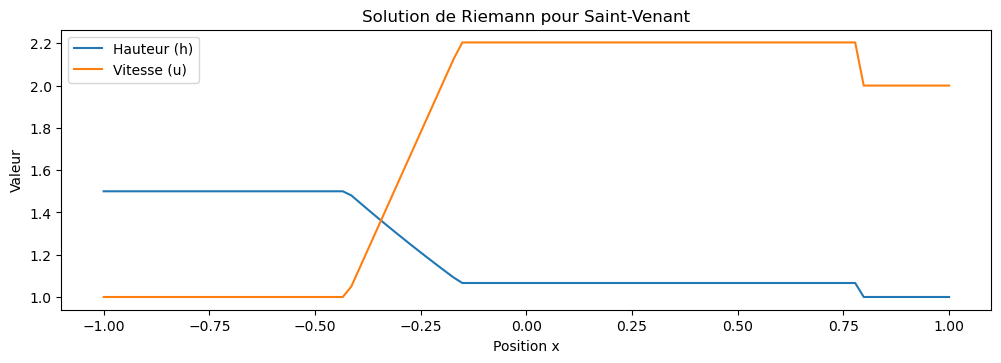

In [12]:
#  Test of Riemann solver
T = 0.15
g = 9.81
# Conditions initiales en vecteurs (h, hu)
UL = np.array([1.5, 1.5 * 1.0])  
UR = np.array([1.0, 1.0 * 2.0])  
X = np.linspace(-1, 1, 100) 
# Compute the solution
solution = np.array([Test_position(x, T, UL, UR, g) for x in X])
# Extract the height and velocity
h = solution[:, 0]
u = solution[:, 1]/solution[:, 0]
# Affichage
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(X, h, label="Hauteur (h)")
plt.plot(X, u, label="Vitesse (u)")
plt.legend()
plt.xlabel("Position x")
plt.ylabel("Valeur")
plt.title("Solution de Riemann pour Saint-Venant")
plt.show()

**(b)** Find initial conditions $U_L, U_R$ such that the solution contains
To find that, we have some conditions in our course that we use:
1. Only shock waves

This means that to verify the condition $ hr > h_m > h_L$, we initialize some $U_L$ and $U_R$ and calculate $h_m$ using the Newton method to see if it verifies the condition.

In [13]:
# Example of the Newton method
UL = np.array([1, 1 * 1.0]) 
UR = np.array([2.0, 2.0 * 2.0])  
hL = UL[0]
hR = UR[0]
uL = UL[1] / hL
uR = UR[1] / hR
um, hm = newton_method(hL, hR, uL, uR)
print(f"um = {um}, hm = {hm}")

um = 0.2005134300313347, hm = 1.2700109804408746


In this case, for example, we have $h_R > h_m > h_L$, then we have only shock waves.

2. only rarefaction waves

This means that to verify the condition $ hr < h_m < h_L$, we initialize some $U_L$ and $U_R$ and calculate $h_m$ using the Newton method to see if it verifies the condition.

In [14]:
# Example of the Newton method
UL = np.array([2, 2 * 1.0]) 
UR = np.array([1.0, 1.0 * 2.0])  
hL = UL[0]
hR = UR[0]
uL = UL[1] / hL
uR = UR[1] / hR
um, hm = newton_method(hL, hR, uL, uR)
print(f"um = {um}, hm = {hm}")

um = 2.799486572722646, hm = 1.2700109814166733


In this case, for example, we have $h_R < h_m < h_L$, then we have only rarefaction waves.

3. Rarefaction and shock waves

To determine this, we need to check the conditions for both rarefaction and shock waves. We can calculate the intermediate state $U_m$ using the Newton method and verify the following conditions:
- For rarefaction waves: $h_m < h_L$ or $h_m < h_R$
- For shock waves: $h_m > h_L$ or $h_m > h_R$


In [15]:
# Example of the Newton method
UL = np.array([1.5, 1.5 * 1.0]) 
UR = np.array([1.0, 1.0 * 2.0])  
hL = UL[0]
hR = UR[0]
uL = UL[1] / hL
uR = UR[1] / hR
um, hm = newton_method(hL, hR, uL, uR)
print(f"um = {um}, hm = {hm}")

um = 2.203960821695362, hm = 1.0661539635487238


In this case, for example, we have $h_R < h_m$ and $ h_m < h_L$, then we have only rarefaction waves.

**(c)** Compute a numerical reference solution on a fine grid using $ N = 1000 $ cells with the local Lax-Friedrichs scheme for the initial Riemann Problems (i), (ii), (iii). Plot the numerical solution using the exact Riemann solver with $ N = 100 $ cells against the reference solution to verify if the exact Riemann solver is implemented correctly.

In [16]:
# Euler Shallow water
# F(U) = (h*u , h*u^2 + 0.5* g * h )
def flux(U,g):
    h = U[0]
    u = U[1]/U[0]
    return np.array([h* u, h*u**2 + 0.5 * g*h**2])

In [17]:
# Local Lax-Friedichs scheme of the Saint-Venant equations
def localLax_friedrichs(N, T,x,a,b, UL, UR,g):
    # Compute the flux
    # Compute the solution at the next time step
    U = np.zeros((2, N))
    dx = (b - a) / N
    for i in range(N):
        U[:, i] = UL if x[i] < 0 else UR
    alpha = max(abs(UL[1] / UL[0]) - np.sqrt( g * UL[0]),
                        abs(UL[1] / UL[0]) + np.sqrt( g * UL[0]))
    dt = 0.2 * dx / alpha
    Nt = int(T/dt)
    U[:, 0] = UL
    U[:, -1] = UR
    for n in range(Nt):
        # Apply boundary conditions
        U_new = np.zeros_like(U)
        U_new[:, 0] = U[:, 0]
        for i in range(1,N-1):
            F_plus_half = 0.5*(flux(U[:,i],g) + flux(U[:,i+1],g)) + (alpha/2)*(-U[:, i+1] + U[:, i])
            F_moins_half = 0.5*(flux(U[:,i-1],g) + flux(U[:,i],g)) + (alpha/2)*(-U[:, i] + U[:, i-1])
            U_new[:,i] = U[:,i] - dt / dx * (F_plus_half - F_moins_half)
        U_new[:, -1] = U[:, -1]
        U = U_new
    return U

1. Only shock waves test with :

The initial condition vectors are:
- $U_L = \begin{pmatrix} 1 \\ 1 \cdot 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}$
- $U_R = \begin{pmatrix} 2 \\ 2 \cdot 2 \end{pmatrix} = \begin{pmatrix} 2 \\ 4 \end{pmatrix}$

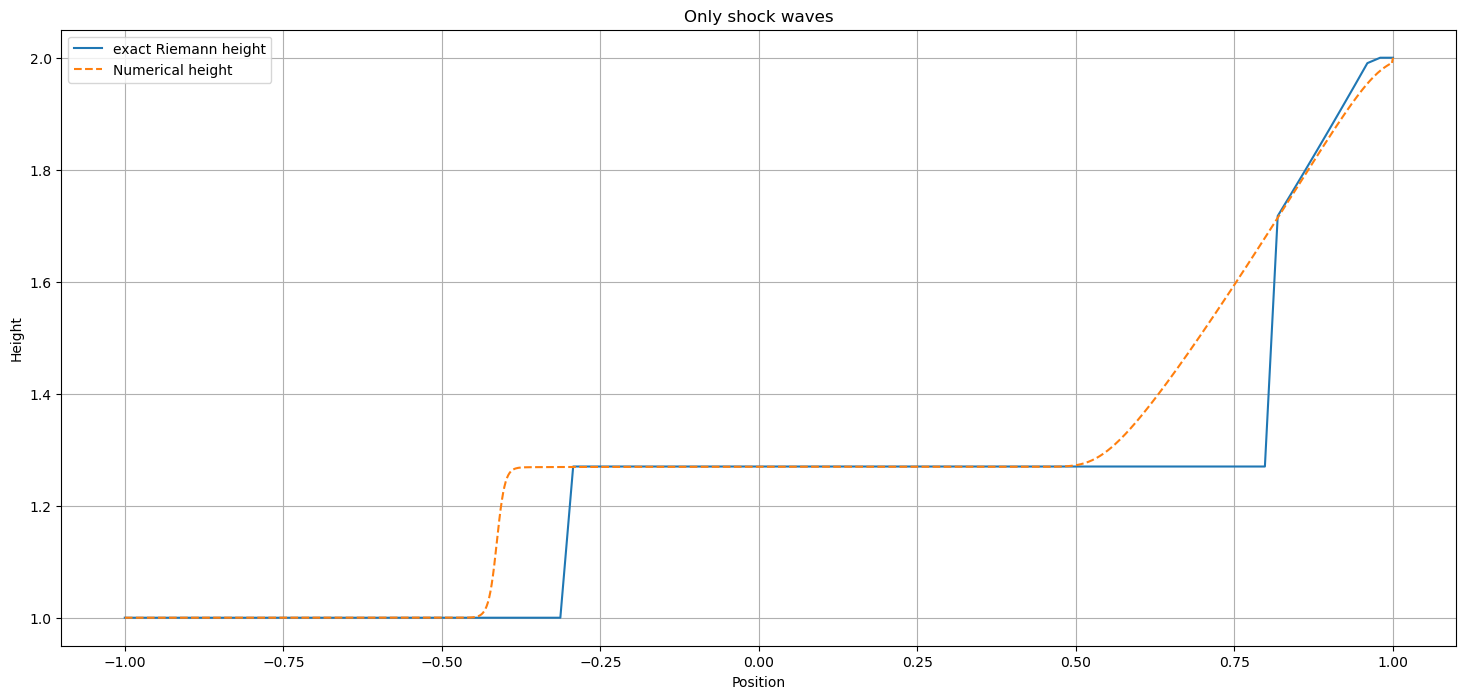

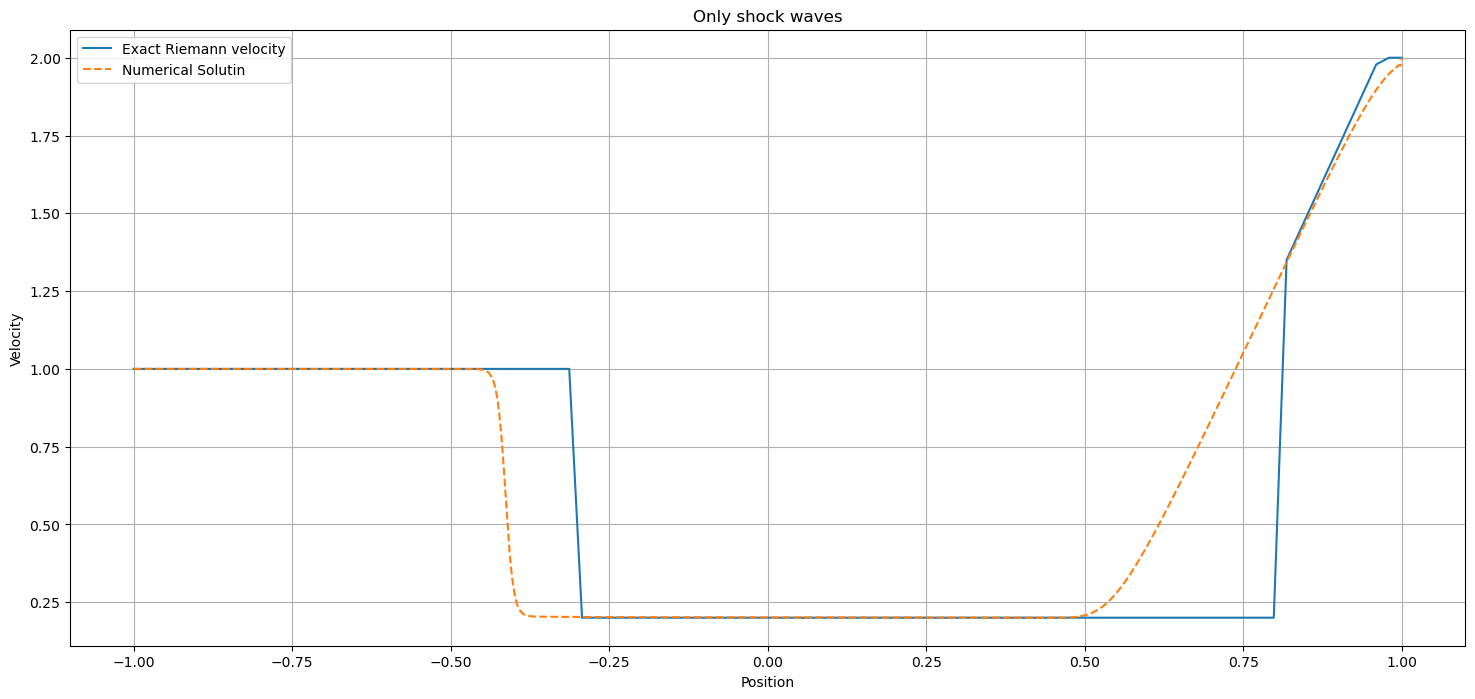

In [18]:
#  Test of Riemann solver
T = 0.15
g = 9.81
N1 = 1000
N2 = 100
a = -1
b = 1
# Conditions initiales en vecteurs (h, hu)
UL = np.array([1.0, 1.0 * 1.0]) 
UR = np.array([2.0, 2.0 * 2.0])  
X = np.linspace(a, b, N2) 
t = np.linspace(a, b, N1)
# Compute the solution
solution = np.array([Test_position(x, T, UL, UR, g) for x in X])
U_app = localLax_friedrichs(N1, T, t, a, b, UL, UR, g)
# Extract the height and velocity
h = solution[:, 0]
u = solution[:, 1]/solution[:, 0]
# Plot the height
plt.figure(figsize=(18, 8))
plt.plot(X, h, label='exact Riemann height')
plt.plot(t, U_app[0, :], label='Numerical height', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Height')
plt.title('Only shock waves')
plt.legend()
plt.grid(True)
plt.show()

# plot the velocity
plt.figure(figsize=(18, 8))
plt.plot(X, u, label='Exact Riemann velocity')
plt.plot(t, U_app[1,:]/U_app[0,:], label='Numerical Solutin', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Only shock waves')
plt.legend()
plt.grid(True)
plt.show()

2. only rarefaction waves test with :

The initial condition vectors are:
- $U_L = \begin{pmatrix} 2 \\ 2 \cdot 1 \end{pmatrix} = \begin{pmatrix} 2 \\ 2 \end{pmatrix}$
- $U_R = \begin{pmatrix} 1 \\ 1 \cdot 2 \end{pmatrix} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$

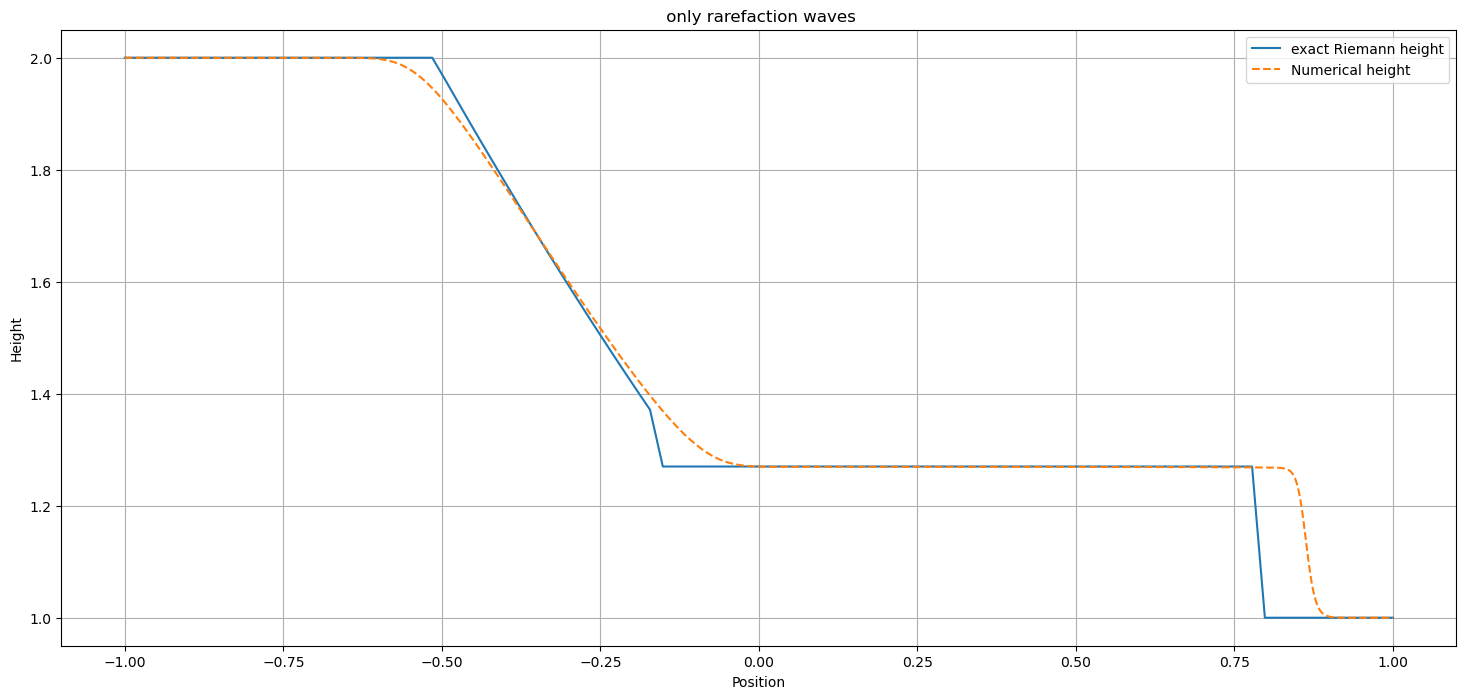

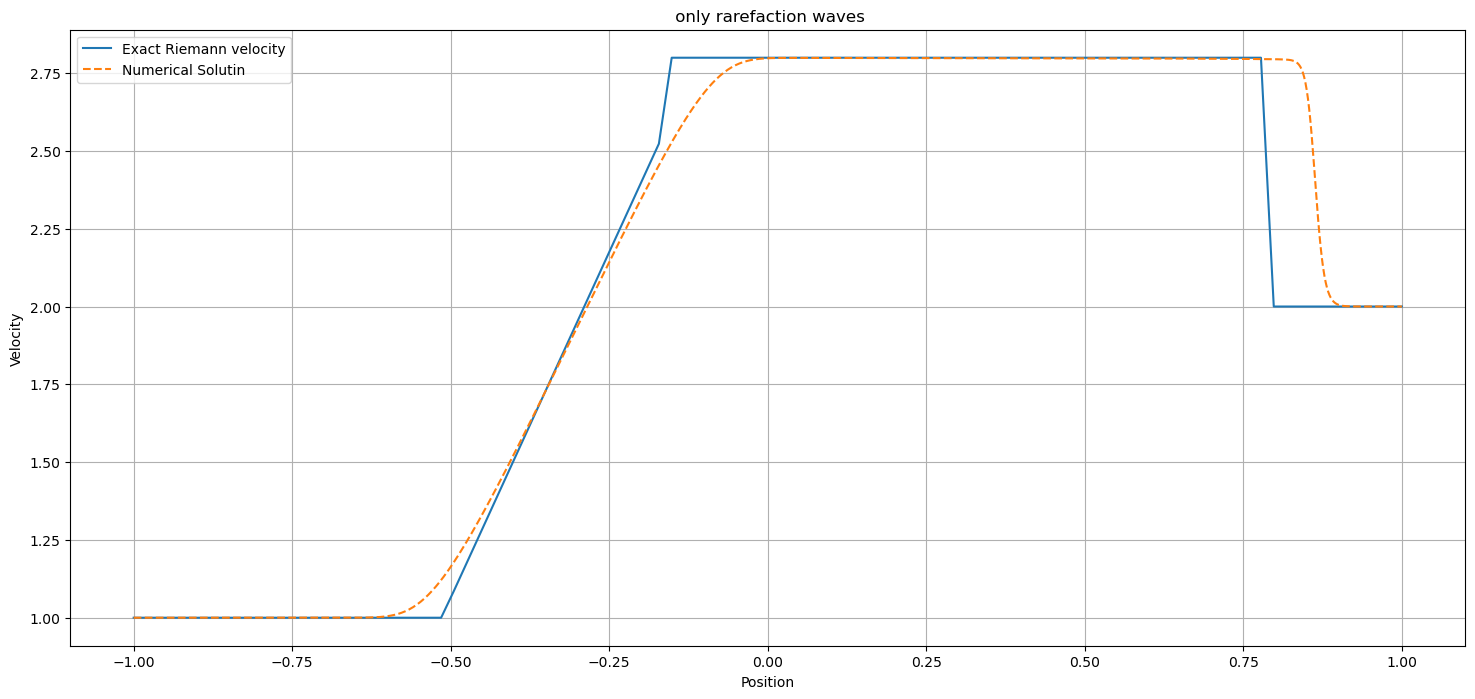

In [19]:
#  Test of Riemann solver
T = 0.15
g = 9.81
N1 = 1000
N2 = 100
a = -1
b = 1
# Conditions initiales en vecteurs (h, hu)
UL = np.array([2, 2 * 1.0]) 
UR = np.array([1.0, 1.0 * 2.0])  
X = np.linspace(a, b, N2) 
t = np.linspace(a, b, N1)
# Compute the solution
solution = np.array([Test_position(x, T, UL, UR, g) for x in X])
U_app = localLax_friedrichs(N1, T, t, a, b, UL, UR, g)
# Extract the height and velocity
h = solution[:, 0]
u = solution[:, 1]/solution[:, 0]
# Plot the height
plt.figure(figsize=(18, 8))
plt.plot(X, h, label='exact Riemann height')
plt.plot(t, U_app[0, :], label='Numerical height', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Height')
plt.title(' only rarefaction waves')
plt.legend()
plt.grid(True)
plt.show()

# plot the velocity
plt.figure(figsize=(18, 8))
plt.plot(X, u, label='Exact Riemann velocity')
plt.plot(t, U_app[1,:]/U_app[0,:], label='Numerical Solutin', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title(' only rarefaction waves')
plt.legend()
plt.grid(True)
plt.show()

3. Rarefaction and shock waves test with :

The initial condition vectors are:
- $U_L = \begin{pmatrix} 1.5 \\ 1.5 \cdot 1 \end{pmatrix} = \begin{pmatrix} 1.5 \\ 1.5 \end{pmatrix}$
- $U_R = \begin{pmatrix} 1 \\ 1 \cdot 2 \end{pmatrix} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$

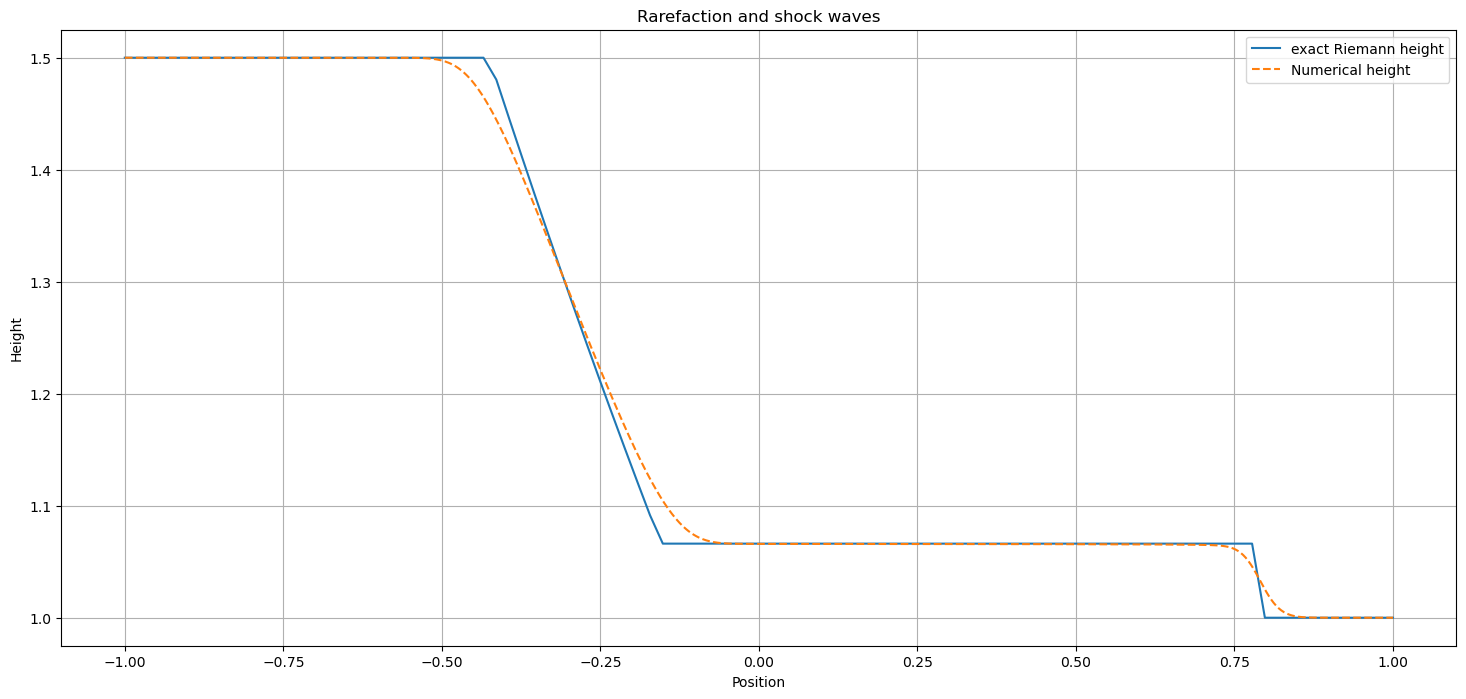

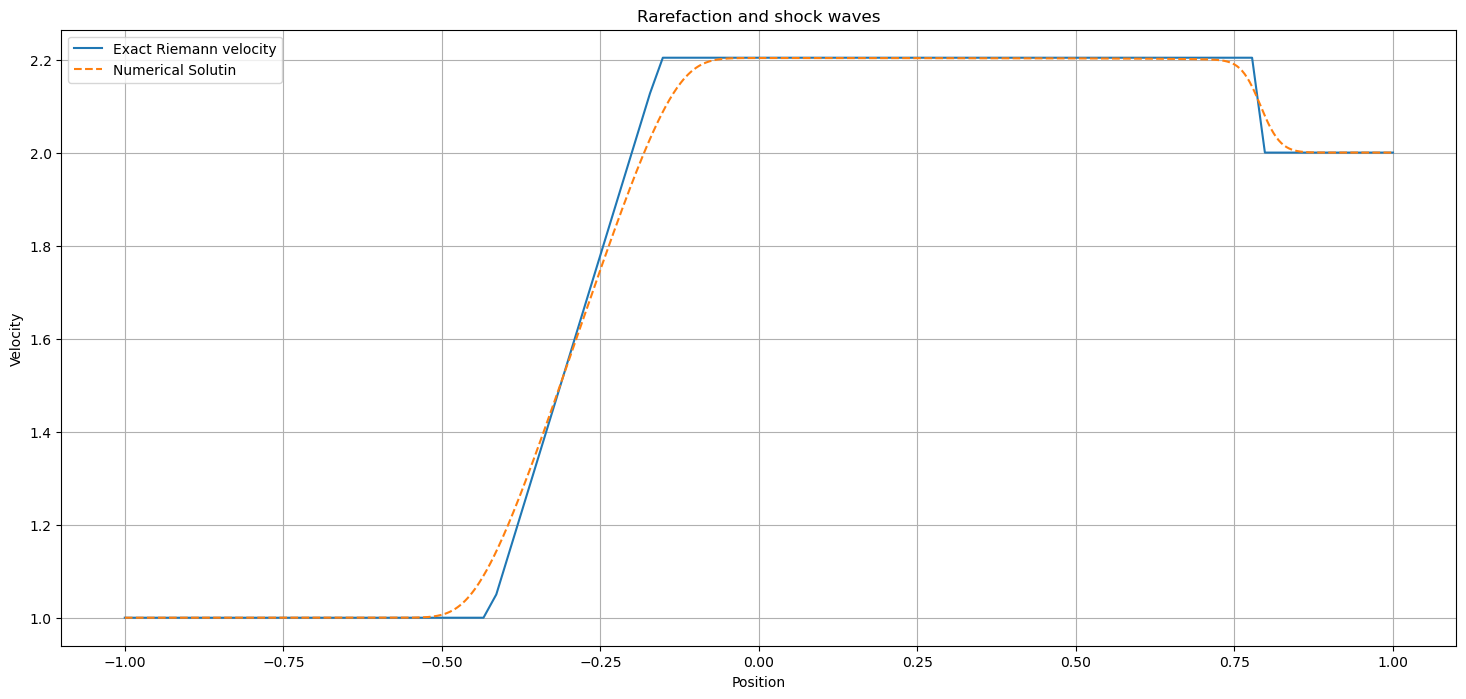

In [20]:
#  Test of Riemann solver
T = 0.15
g = 9.81
N1 = 1000
N2 = 100
a = -1
b = 1
# Conditions initiales en vecteurs (h, hu)
UL = np.array([1.5, 1.5 * 1.0]) 
UR = np.array([1.0, 1.0 * 2.0])  
X = np.linspace(a, b, N2) 
t = np.linspace(a, b, N1)
# Compute the solution
solution = np.array([Test_position(x, T, UL, UR, g) for x in X])
U_app = localLax_friedrichs(N1, T, t, a, b, UL, UR, g)
# Extract the height and velocity
h = solution[:, 0]
u = solution[:, 1]/solution[:, 0]
# Plot the height
plt.figure(figsize=(18, 8))
plt.plot(X, h, label='exact Riemann height')
plt.plot(t, U_app[0, :], label='Numerical height', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Height')
plt.title('Rarefaction and shock waves')
plt.legend()
plt.grid(True)
plt.show()

# plot the velocity
plt.figure(figsize=(18, 8))
plt.plot(X, u, label='Exact Riemann velocity')
plt.plot(t, U_app[1,:]/U_app[0,:], label='Numerical Solutin', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Rarefaction and shock waves')
plt.legend()
plt.grid(True)
plt.show()

## Exercice 3 : Isentropic Euler equations

We consider the isentropic Euler equations for the simulation of compressible gas flows. They are given by
$$
\partial_t
\begin{pmatrix}
\rho \\
\rho u
\end{pmatrix}
+ \partial_x
\begin{pmatrix}
\rho u \\
\rho u^2 + \kappa \rho^\gamma
\end{pmatrix}
= 0 \quad \text{on} \ [a, b] \times (0, T)
$$
where $ \rho > 0 $ denotes the gas density, $ u $ the velocity, $ \kappa > 0 $, $ \gamma > 1 $ are constants.

***(a)*** Proof that the isentropic Euler equations are hyperbolic. Therefore you can use that the sound speed is defined as $ c = \sqrt{\partial p / \partial \rho} > 0 $ with $ p = \kappa \rho^\gamma $.

***(b)*** Determine the characteristic speeds and the type of characteristic fields. Which type of waves can arise in the solution of a Riemann Problem?

***(c)*** Implement a finite volume scheme based on the HLL scheme with
1. the averaged procedure to estimate the wave speeds $ S_L, S_R $
2. the maximum of the local wave speeds $ S $ and set $ S_L = -S $, $ S_R = S $.

***(d)*** Compute the numerical solution using both methods for the initial condition composed of two constant states
$$
U_L =
\begin{pmatrix}
1 \\
-1
\end{pmatrix}
, \quad U_R =
\begin{pmatrix}
0.25 \\
1
\end{pmatrix}
$$
and $ \kappa = 1 $. Plot the numerical solutions obtained with the methods of (c) and describe the solution for $ \gamma = 2 $. What type of waves does the solution contain?

# Ansewers

**(a)** Proof that the isentropic Euler equations are hyperbolic. Therefore you can use that the sound speed is defined as $ c = \sqrt{\partial p / \partial \rho} > 0 $ with $ p = \kappa \rho^\gamma $.

To prove that, we calculate the characteristic speeds. But before that, we rewrite the system in matrix form and compute the gradient of the function $ F $ associated.

The isentropic Euler equations are:
$$
\partial_t
\begin{pmatrix}
\rho \\
\rho u
\end{pmatrix}
+ 
\partial_x
\begin{pmatrix}
\rho u \\
\rho u^2 + \kappa \rho^\gamma
\end{pmatrix}
= 0.
$$

Matrix form given by:

Let
$$
U =
\begin{pmatrix}
\rho \\
\rho u
\end{pmatrix},
\quad 
F(U) =
\begin{pmatrix}
\rho u \\
\rho u^2 + \kappa \rho^\gamma
\end{pmatrix}.
$$
Then our system becomes
$$
\partial_t U + \partial_x F(U) = 0.
$$

Determining the Jacobian of $ F(U) $:
$$
J = \frac{\partial F}{\partial U} =
\begin{pmatrix}
0 & 1 \\
c^2 - u^2 & 2u
\end{pmatrix},
$$
where $ c^2 = \gamma \kappa \rho^{\gamma - 1} $ is the square of the sound speed.

Now we compute the eigenvalues of $ J $.

For that, we calculate the characteristic polynomial of $ J $:
$$
P(\lambda) = \det(J - \lambda I) = \det \begin{pmatrix}
-\lambda & 1 \\
c^2 - u^2 & 2u - \lambda
\end{pmatrix} = 0
$$

which simplifies to:
$$
\lambda^2 - 2u\lambda + (u^2 - c^2) = 0.
$$

The solutions are:
$$
\lambda_{1,2} = u \pm c.
$$

Since $ c > 0 $, the eigenvalues are real and distinct. This means the system associated with the isentropic Euler equations is hyperbolic.

***(b)*** Determine the characteristic speeds and the type of characteristic fields. Which type of waves can arise in the solution of a Riemann Problem?


By the previous question we have the speeds characterstics given by :
$ \lambda_1 = u - c $ and $ \lambda_2 = u + c $
Now Determining the characterstic fieled associated the system, for that we campute the eigenvoctors by this relation:
$$
A v = \lambda v \quad \text{such that} \quad v = \begin{pmatrix} x \\ y \end{pmatrix}
$$

- For $ \lambda_1 = u - c $ :

This gives us the system:
$$
\begin{cases}
y = x(u-c)\\
x(c^2 - u^2) + 2uy = (u-c)y
\end{cases}
\quad \implies \quad
\begin{cases}
 y = x(u-c)\\
x(c^2 - u^2) + 2ux(u-c) = x(u-c)^2
\end{cases}
$$
$$
\begin{cases}
y = x(u-c)\\
-x(u+c) + 2ux = x(u-c)
\end{cases}
\quad \implies \quad
\begin{cases}
  x \in R\\
  y = x(u-c)
\end{cases}
$$
Thus, the eigenvector associated with $\lambda_1$ is given by $r_1 = x (1,u-c)^T$ with $x \in \mathbb{R}$. We take $x = 1$, then $r_1 = (1,u-c)^T$.

- The same for $ \lambda_2 = u + c $ :

This gives us the system:
$$
\begin{cases}
y = x(u+c)\\
x(c^2 - u^2) + 2uy = (u+c)y
\end{cases}
\quad \implies \quad
\begin{cases}
 y = x(u+c)\\
x(c^2 - u^2) + 2ux(u+c) = x(u+c)^2
\end{cases}
$$
$$
\begin{cases}
y = x(u+c)\\
-x(u-c) + 2ux = x(u+c)
\end{cases}
\quad \implies \quad
\begin{cases}
  x \in R\\
  y = x(u+c)
\end{cases}
$$
Thus, the eigenvector associated with $\lambda_2$ is given by $r_2 = x (1,u+c)^T$ with $x \in \mathbb{R}$. We take $x = 1$, then $r_1 = (1,u+c)^T$.

Thus, the system is hyperbolic with speeds (eigenvalues) and corresponding characteristic fields (eigenvectors) as follows:
- Characteristic speed $\lambda_1 = u - c$ has field $r_1 = \begin{pmatrix} 1 \\ u - c \end{pmatrix}$
- Characteristic speed $\lambda_2 = u + c$ has field $r_2 = \begin{pmatrix} 1 \\ u + c \end{pmatrix}$

Now we determine the type of both characteristic fields. For that, we calculate this relation:
$$
\nabla_u \lambda_i(U) \cdot r_i = ?
$$

First, we have:
$$
U =
\begin{pmatrix}
\rho \\
\rho u
\end{pmatrix}
$$

Denote that $ A = \rho u $, then $ u = \frac{A}{\rho} $. For $\lambda_1 = u - c = \frac{A}{\rho} - \sqrt{\gamma \kappa \rho^{\gamma - 1}} $, we have:
$$
\nabla_u \lambda_1(\rho, A) = \begin{pmatrix} -\frac{A}{\rho^2} - \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} \\ \frac{1}{\rho} \end{pmatrix} = \begin{pmatrix} -\frac{u}{\rho} - \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} \\ \frac{1}{\rho} \end{pmatrix}
$$

Thus,
$$
\begin{aligned}
\nabla_u \lambda_1(\rho, \rho u) \cdot r_1(\rho, \rho u) &= \begin{pmatrix} -\frac{u}{\rho} - \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} \\ \frac{1}{\rho} \end{pmatrix} \cdot \begin{pmatrix} 1 \\ u - c \end{pmatrix} \\
&= -\frac{u}{\rho} - \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} + \frac{u - c}{\rho} \\
&= - \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} - \frac{c}{\rho}
\end{aligned}
$$
then,
$$
\nabla_u \lambda_1(\rho, \rho u) \cdot r_1(\rho, \rho u) \neq 0
$$
It means that the first field is generally non-linear.

For the second case, we have $\lambda_2 = u + c = \frac{A}{\rho} + \sqrt{\gamma \kappa \rho^{\gamma - 1}} $:
$$
\nabla_u \lambda_2(\rho, A) = \begin{pmatrix} -\frac{A}{\rho^2} + \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} \\ \frac{1}{\rho} \end{pmatrix} = \begin{pmatrix} -\frac{u}{\rho} + \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} \\ \frac{1}{\rho} \end{pmatrix}
$$

Thus,
$$
\begin{aligned}
\nabla_u \lambda_2(\rho, \rho u) \cdot r_2(\rho, \rho u) &= \begin{pmatrix} -\frac{u}{\rho} + \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} \\ \frac{1}{\rho} \end{pmatrix} \cdot \begin{pmatrix} 1 \\ u + c \end{pmatrix} \\
&= -\frac{u}{\rho} + \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} + \frac{u + c}{\rho} \\
&= \frac{\gamma (\gamma - 1) \rho^{\gamma - 2}}{2c} + \frac{c}{\rho}
\end{aligned}
$$
then,
$$
\nabla_u \lambda_2(\rho, \rho u) \cdot r_2(\rho, \rho u) \neq 0
$$
It means that the second field is generally non-linear.

For a Riemann problem with weak solution $ U(x,t) $ given by 
$$
U(x,t) = \begin{cases}
u_L & \text{if } \frac{x}{t} < \sigma \\
u_R & \text{if } \frac{x}{t} > \sigma 
\end{cases}
$$

To determine the type of discontinuities, we first note that both fields are generally non-linear. By the Rankine-Hugoniot conditions and the Lax condition with a given the initial conditions  
$$
U_L = 
\begin{pmatrix}
\rho_L \\
\rho_L u_L
\end{pmatrix},
\quad
U_R = 
\begin{pmatrix}
\rho_R \\
\rho_R u_R
\end{pmatrix},
$$
The type of waves depending on the relative values of $U_L$ and $U_R$ becouse 
the fields associated with $\lambda_1 = u - c$ and $\lambda_2 = u + c$ are both **generally nonlinear**, as $\nabla_U \lambda_i \cdot r_i \neq 0$.  
So, the specific type of wave (shock or rarefaction) in each field depends on the jump conditions and the relative signs of $\lambda_i(U_L)$ and $\lambda_i(U_R)$. Using the **Rankine-Hugoniot conditions** for shocks 
$$
S = \frac{[\rho u]}{[\rho]} = \frac{\rho_R u_R - \rho_L u_L}{\rho_R - \rho_L} 
$$
and the characteristic structure for rarefactions. 
$$
\lambda_i(U_L) > S> \lambda_i(U_R)
$$

**(c)** Implement a finite volume scheme based on the HLL scheme with
1. the averaged procedure to estimate the wave speeds $ S_L, S_R $


For the isentropic Euler equations, the wave speeds are determined by the propagation speeds of the characteristics. The expressions for $ S_L $ and $ S_R $ are chosen to encompass all possible wave propagation speeds in the Riemann problem.

The expressions for $ S_L $ and $ S_R $ are chosen by:

$$
S_L = \min(\lambda_1(UL),\lambda_1(UR)) =\min(u_L - c_L, u_R - c_R) 
$$

$$
S_R = \max(\lambda_2(UL),\lambda_2(UR)) =\max(u_L + c_L, u_R + c_R)
$$

I found this information in the book "Finite Volume Methods for Hyperbolic Problems".

In [21]:
# Euler isentropic equations flux function
# F(U) = (rho * u, rho * u^2 + kappa * rho^gamma)^T
def flux(U, kappa, gamma):
    rho = U[0]
    u = U[1] / rho
    return np.array([rho * u, rho * u**2 + kappa * rho**gamma])

In [22]:
# HLL scheme with average estimation of wave speeds
def hll_scheme(UL, UR, kappa, gamma):
    # Compute the wave speeds
    rhoL, uL = UL[0], UL[1] / UL[0]
    rhoR, uR = UR[0], UR[1] / UR[0]
    cL = np.sqrt(gamma * kappa * rhoL**(gamma - 1))
    cR = np.sqrt(gamma * kappa * rhoR**(gamma - 1))
    # Compute the local wave speeds
    SL = min(uL - cL, uR - cR)
    SR = max(uL + cL, uR + cR)
    
    # Compute the fluxes
    FL = flux(UL, kappa, gamma)
    FR = flux(UR, kappa, gamma)
    
    # Compute the HLL flux
    if SL >= 0:
        return FL
    elif SR <= 0:
        return FR
    else:
        return (SR * FL - SL * FR + SL * SR * (UR - UL)) / (SR - SL)

2. the maximum of the local wave speeds $ S $ and set $ S_L = -S $, $ S_R = S $.

In [23]:
# HLL scheme with maximum local wave speeds
def hll_max_scheme(U_L, U_R, kappa, gamma):
    # Compute the wave speeds
    rho_L, u_L = U_L[0], U_L[1] / U_L[0]
    rho_R, u_R = U_R[0], U_R[1] / U_R[0]
    c_L = np.sqrt(gamma * kappa * rho_L**(gamma - 1))
    c_R = np.sqrt(gamma * kappa * rho_R**(gamma - 1))
    # Compute the maximum local wave speeds
    S = max(abs(u_L) + c_L, abs(u_R) + c_R)
    S_L = -S
    S_R = S
    
    # Compute the fluxes
    F_L = flux(U_L, kappa, gamma)
    F_R = flux(U_R, kappa, gamma)
    
    # Compute the HLL flux
    if S_L >= 0:
        return F_L
    elif S_R <= 0:
        return F_R
    else:
        return (S_R * F_L - S_L * F_R + S_L * S_R * (U_R - U_L)) / (S_R - S_L)

***(d)*** Compute the numerical solution using both methods for the initial condition composed of two constant states
$$
U_L =
\begin{pmatrix}
1 \\
-1
\end{pmatrix}
, \quad U_R =
\begin{pmatrix}
0.25 \\
1
\end{pmatrix}
$$
and $ \kappa = 1 $. Plot the numerical solutions obtained with the methods of (c) and describe the solution for $ \gamma = 2 $. What type of waves does the solution contain?

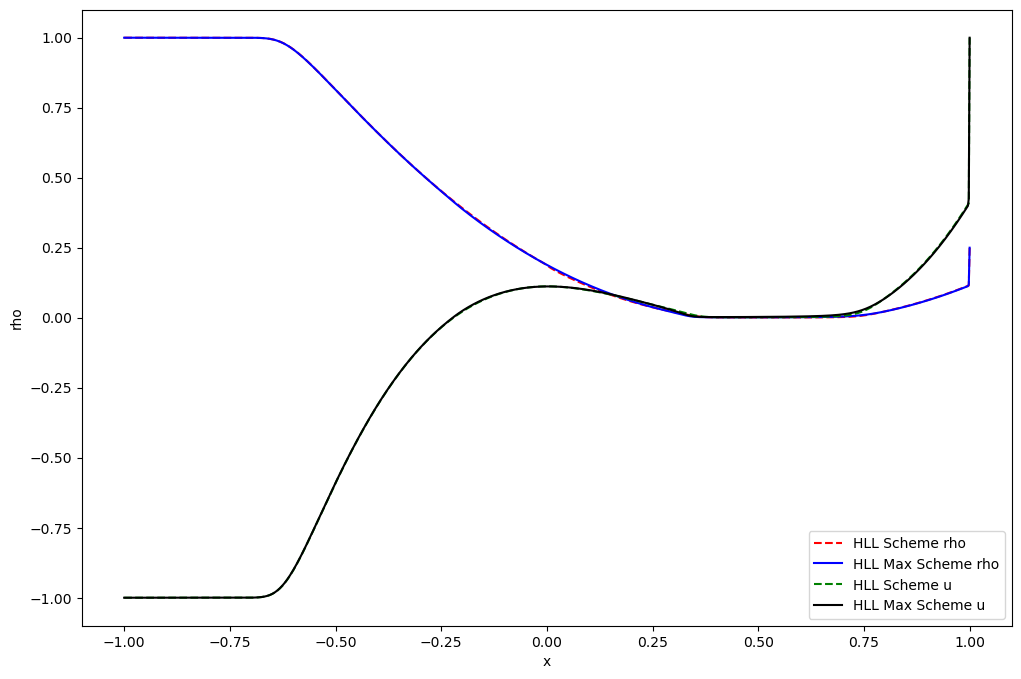

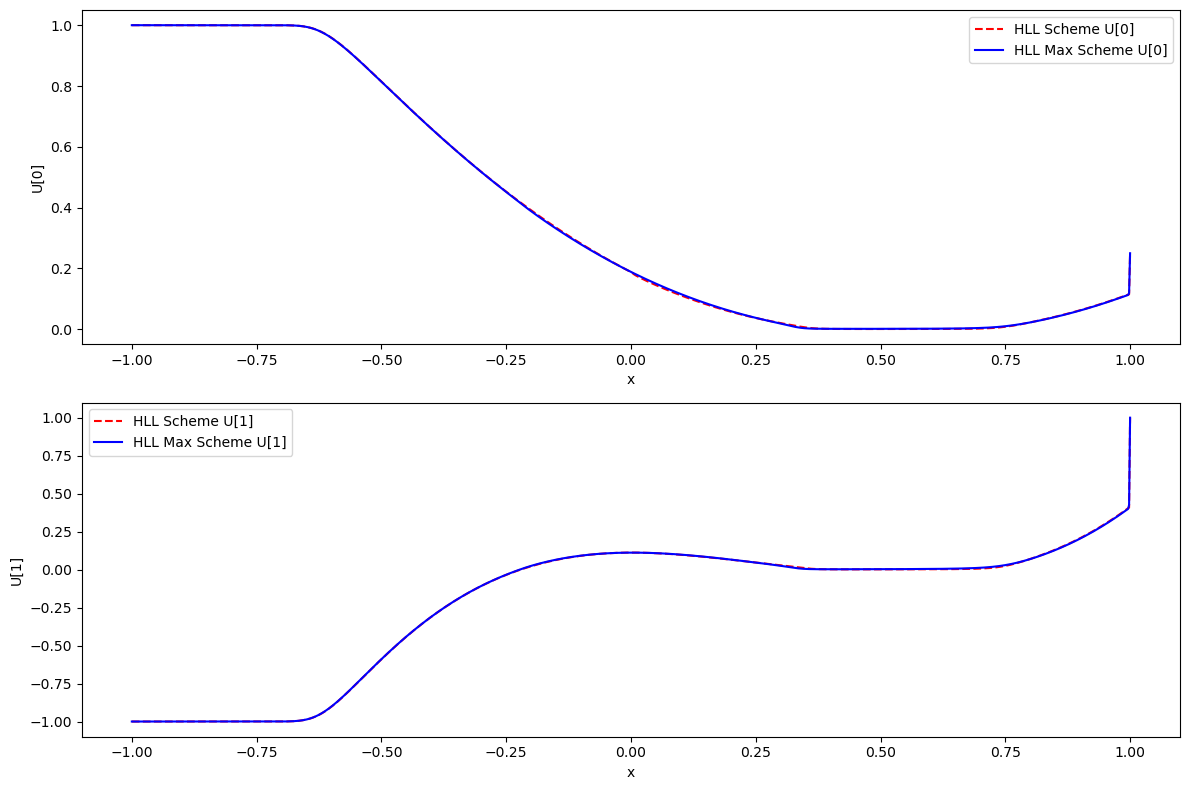

In [24]:
# Volume fini to solve the Riemann problem for the Euler equations
def solve_riemann(U_L, U_R, kappa, gamma, N, T, scheme,a,b):
    x = np.linspace(a, b, N)
    dx = (b - a) / (N - 1)
    dt = 0.5 * dx / max(abs(U_L[1] / U_L[0]) - np.sqrt(gamma * kappa * U_L[0]**(gamma - 1)),
                        abs(U_R[1] / U_R[0]) + np.sqrt(gamma * kappa * U_R[0]**(gamma - 1)))
    Nt = int(T / dt)
    U = np.zeros((2, N))
    for i in range(N):
        U[:, i] = U_L if x[i] < 0 else U_R
    
    
    for n in range(Nt):
        U_new = np.zeros_like(U)
        U_new[:, 0] = U[:, 0]
        for i in range(1, N-1):
            F_plus_half = scheme(U[:, i], U[:, i+1], kappa, gamma)
            F_moins_half = scheme(U[:, i-1], U[:, i], kappa, gamma)
            U_new[:, i] = U[:, i] - dt / dx * (F_plus_half - F_moins_half)
        U_new[:, -1] = U[:, -1]
        U = U_new
    
    return x, U

# Initial conditions and parameters
a = -1
b = 1
U_L = np.array([1, -1])
U_R = np.array([0.25, 1])
kappa = 1
gamma = 2
N = 1000
T = 0.25

# Solve the system with HLL and HLL Max schemes
x, U_hll = solve_riemann(U_L, U_R, kappa, gamma, N, T, hll_scheme,a,b)
x, U_hll_max = solve_riemann(U_L, U_R, kappa, gamma, N, T, hll_max_scheme,a,b)
plt.figure(figsize=(12, 8))
plt.plot(x, U_hll[0, :], 'r--', label='HLL Scheme rho')
plt.plot(x, U_hll_max[0, :], 'b-', label='HLL Max Scheme rho')
plt.plot(x, U_hll[1, :], 'g--', label='HLL Scheme u')
plt.plot(x, U_hll_max[1, :], 'k-', label='HLL Max Scheme u')
plt.xlabel('x')
plt.ylabel('rho')
plt.legend()
plt.show()

# Affichage des résultats
plt.figure(figsize=(12, 8))
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(x, U_hll[i, :], 'r--', label=f'HLL Scheme U[{i}]')
    plt.plot(x, U_hll_max[i, :], 'b-', label=f'HLL Max Scheme U[{i}]')
    plt.xlabel('x')
    plt.ylabel(f'U[{i}]')
    plt.legend()
plt.tight_layout()
plt.show()

 What type of waves does the solution contain?

Based on the information from these two figures, we have:
- A rarefaction wave on the left (in $\rho$) becouse ($ \rho_L > \rho_R $)
- A shock wave on the right (in $u$) by Rankine-Hugoniot condition